In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

# Część 2

1. Zmierzyć fotoprąd wytwarzany w ogniwie w funkcji długości fali w zakresie 4000-
1200 nm. Wartości długości fali dobrać tak, aby punkty pomiarowe były równomiernie
i wystarczająco gęsto (nie rzadziej niż co 0,05 eV) rozłożone w skali energii.


2. Wykorzystując plik photon flux zawierający rozkład spektralny światła padającego
na próbkę, wykonać wykres rozkładu fotoprądu w funkcji energii padających fotonów
znormalizowany na jeden padający foton (ponieważ nie znamy dokładnej liczby
fotonów padających na strukturę, możemy jedynie określić ten rozkład w jednostkach
dowolnych)


In [2]:
eqe = pd.read_csv('in/EQE/eqe.csv')
eqe['lambda'] *= 1e-6 #convert to m
eqe[:5]

,lambda,flux,U[mV],zakres,EQE
0,0.000002,10.45,0.57,200,0.054545
1,0.000002,12.50,0.66,200,0.052800
2,0.000002,15.90,0.76,200,0.047799
3,0.000002,20.20,0.93,200,0.046040
4,0.000002,23.20,1.14,200,0.049138


In [3]:
h = 6.62607015e-34 #m2 kg / s
c = 2.99e8 #m/s

def J_to_eV(E):
    return 6.242e+18*E

eqe['E']=J_to_eV(h*c/eqe['lambda'])
eqe[:5]

,lambda,flux,U[mV],zakres,EQE,E
0,0.000002,10.45,0.57,200,0.054545,0.618331
1,0.000002,12.50,0.66,200,0.052800,0.650875
2,0.000002,15.90,0.76,200,0.047799,0.687034
3,0.000002,20.20,0.93,200,0.046040,0.727448
4,0.000002,23.20,1.14,200,0.049138,0.772914


3. Wyznaczyć wartość przerwy energetycznej absorbera posługując się metodą „w
połowie krawędzi”.

      lambda  flux   U[mV]  zakres      EQE         E  eqe_minus_mid
17  0.000001  16.0  2166.0   20000  135.375  1.166662      11.262306


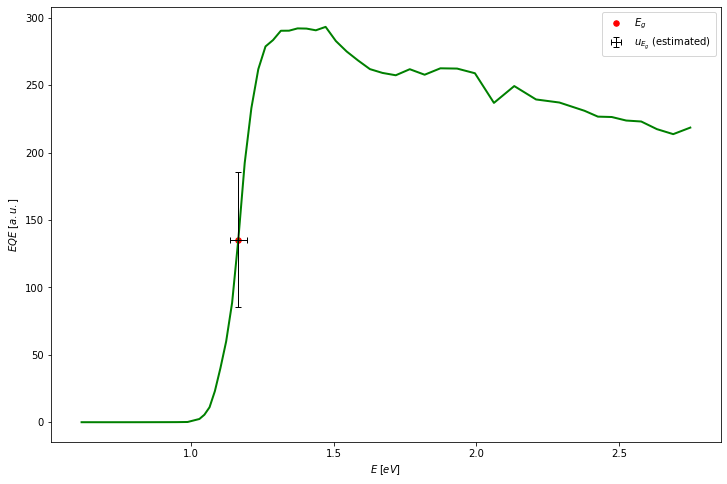

146.6373055162657

In [4]:

plt.figure(figsize=(12,8))

dotcolor = 'green'
dotsize = 2
plt.plot(eqe['E'], eqe['EQE'], linewidth=dotsize, color = dotcolor)

plt.xlabel(r'$E \; [eV]$')
plt.ylabel(r'$EQE \; [a.u.]$')

eqe_min = eqe['EQE'].min()
eqe_max = eqe['EQE'].max()
eqe_mid = (eqe_min + eqe_max)/2

eqe['eqe_minus_mid'] = eqe['EQE'] - eqe_mid
eqe['eqe_minus_mid'] = eqe['eqe_minus_mid'].abs()

E_g_slice = eqe.loc[eqe['eqe_minus_mid'] == eqe['eqe_minus_mid'].min()]

print(E_g_slice)

dotcolor = 'red'
plt.scatter(E_g_slice['E'], E_g_slice['EQE'], label=r'$E_g$', color=dotcolor, s=30)
estimated_u_E = [0.03]
estimated_u_EQE = [50]
plt.errorbar(E_g_slice['E'], E_g_slice['EQE'], xerr=estimated_u_E, yerr=estimated_u_EQE, label=r'$u_{E_g}$ (estimated) ' , color='black', elinewidth=1, capsize=3, capthick=1, fmt='none')

plt.savefig('out/img/wyk_eqe_od_E.jpg', dpi=350)

plt.legend()
plt.show()
eqe_mid


4. Wyznaczyć energię odpowiadającą wysokoenergetycznej krawędzi rozkładu. Czemu
on odpowiada?


5. Porównać wartość Voc(T) dla T->0 z wartością przerwy energetycznej otrzymaną
z ekstrapolacji zależności Voc(T) do 0oK, wyciągnąć wnioski.

In [5]:
def C_to_K(x):
    return x + 273.15

#read temperature data for plot and line fit
temp_params = pd.read_csv('out/csv/params_temp.csv')
temp_params['T'] = C_to_K(temp_params['T'])
temp_params

,T,u_T,Uoc,Isc,Imp,Ump,max_power,FF,eta
0,288.15,0.57735,0.59,-0.002402,-0.002261,0.29,-0.000656,0.462790,0.043720
1,298.15,0.57735,0.57,-0.002390,-0.002213,0.29,-0.000642,0.471077,0.042776
2,308.15,0.57735,0.54,-0.002383,-0.002158,0.29,-0.000626,0.486141,0.041713
3,318.15,0.57735,0.52,-0.002353,-0.002060,0.29,-0.000597,0.488237,0.039825
4,328.15,0.57735,0.49,-0.002329,-0.001944,0.29,-0.000564,0.494080,0.037582
5,338.15,0.57735,0.47,-0.002310,-0.001804,0.29,-0.000523,0.481686,0.034868
6,348.15,0.57735,0.44,-0.002292,-0.001749,0.27,-0.000472,0.468161,0.031474


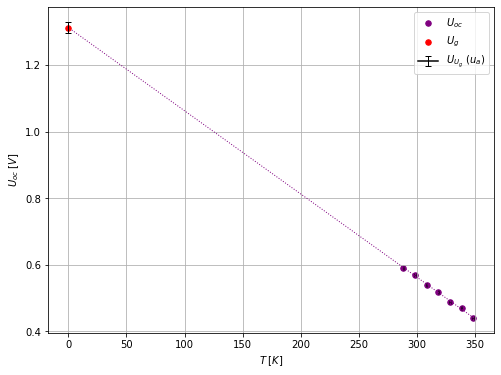

E_g = 1.311(0.018) eV


In [6]:

plt.figure(figsize=(8,6))

dotcolor = 'purple'
dotsize = 30
plt.scatter(temp_params['T'], temp_params['Uoc'], label=r'$U_{oc}$',s=dotsize, color = dotcolor)
plt.errorbar(temp_params['T'], temp_params['Uoc'],xerr=temp_params['u_T'],capthick=0.5,capsize=2,elinewidth=0.5, color='black', fmt="none")

fit = scipy.stats.linregress(temp_params['T'], temp_params['Uoc'])

x_fit = range(3,350)
y_fit = fit.slope*x_fit + fit.intercept
plt.plot(x_fit,y_fit, linewidth=1, color = dotcolor, linestyle=':')

Ug = [fit.intercept]
u_Ug = [fit.intercept_stderr]
plt.scatter(0,Ug,label=r'$U_g$',s=30,color='red')
plt.errorbar(0,Ug,yerr=u_Ug,label=r'$U_{U_g}$ ($u_a$)',elinewidth=1,capsize = 3, capthick=1,color='black')

plt.xlabel(r'$T \; [K]$')
plt.ylabel(r'$U_{oc} \; [V]$')

plt.legend()
plt.grid()

plt.savefig('out/img/wyk_Uoc_od_T_linefit_Eg.jpg', dpi = 350)
plt.show()


Eg = J_to_eV( 1.6e-19 * Ug[0])
u_Eg = J_to_eV( 1.6e-19 * u_Ug[0]) #propagacja niepewności

print(f'E_g = {Eg:.3f}({u_Eg:.3f}) eV')

# Conclusion

from line fit we obtaib $E_g = 1.311(0.018) eV$

and from our EQE plot we estimated that $E_g = 1.118 (0.03) eV$

these values are off byt not ridiculously so.